In [14]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [15]:
# Carregar os dados do arquivo JSON
with open("dados_diferenca_em_metros.json", "r") as arquivo_json:
    dados = json.load(arquivo_json)

In [16]:
# Listas para armazenar as diferenças em metros de latitude e longitude
diferencas_latitude = []
diferencas_longitude = []

# Extrair as diferenças em metros de latitude e longitude dos dados
for dado in dados:
    if 'gnss_data' in dado:
        gnss_data = dado['gnss_data']
        diferenca_latitude = gnss_data['latitudeDiferencaMetros']
        diferenca_longitude = gnss_data['longitudeDiferencaMetros']
        diferencas_latitude.append(diferenca_latitude)
        diferencas_longitude.append(diferenca_longitude)

In [17]:
# Plotar as diferenças em metros de latitude e longitude
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0, 0.5, 'Diferença (metros)')

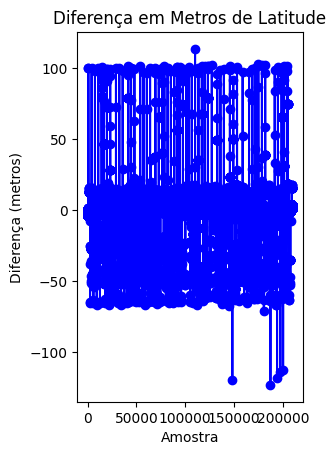

In [18]:
# Plot da diferença de latitude
plt.subplot(1, 2, 1)
plt.plot(diferencas_latitude, marker='o', linestyle='-', color='b')
plt.title('Diferença em Metros de Latitude')
plt.xlabel('Amostra')
plt.ylabel('Diferença (metros)')

Text(0, 0.5, 'Diferença (metros)')

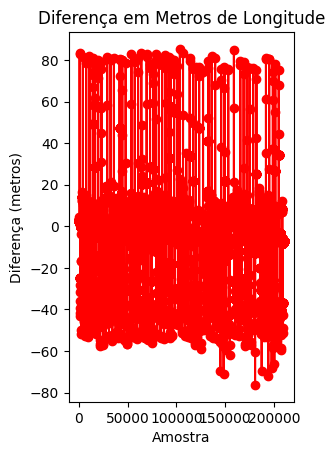

In [19]:
# Plot da diferença de longitude
plt.subplot(1, 2, 2)
plt.plot(diferencas_longitude, marker='o', linestyle='-', color='r')
plt.title('Diferença em Metros de Longitude')
plt.xlabel('Amostra')
plt.ylabel('Diferença (metros)')

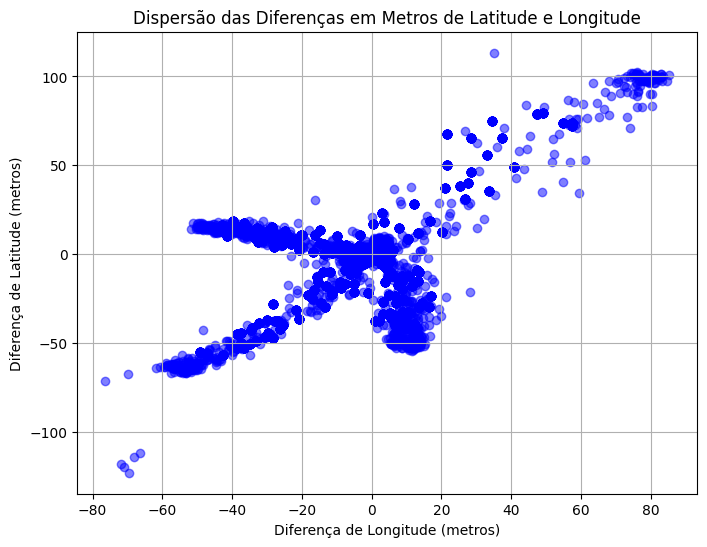

In [20]:
# Plotar o gráfico de dispersão das diferenças em metros de latitude e longitude
plt.figure(figsize=(8, 6))
plt.scatter(diferencas_longitude, diferencas_latitude, color='blue', alpha=0.5)
plt.title('Dispersão das Diferenças em Metros de Latitude e Longitude')
plt.xlabel('Diferença de Longitude (metros)')
plt.ylabel('Diferença de Latitude (metros)')
plt.grid(True)
plt.show()

In [24]:
# Calcular estatísticas para a diferença de latitude
print("Estatísticas para a diferença de latitude em metros:")
print("Média:", np.mean(diferencas_latitude))
print("Mediana:", np.median(diferencas_latitude))
moda_latitude = stats.mode(diferencas_latitude)
#print("Moda:", moda_latitude.mode[0])  # Acessando diretamente o valor de moda
print("Desvio padrão:", np.std(diferencas_latitude))
print("Variação:", np.var(diferencas_latitude))
print("Mínimo:", np.min(diferencas_latitude))
print("Máximo:", np.max(diferencas_latitude))
print()

Estatísticas para a diferença de latitude em metros:
Média: -0.14790966935887775
Mediana: 0.08532531117089093
Desvio padrão: 6.130982045927534
Variação: 37.58894084748577
Mínimo: -122.99038038693834
Máximo: 113.37171392550226



In [26]:
# Calcular estatísticas para a diferença de longitude
print("Estatísticas para a diferença de longitude em metros:")
print("Média:", np.mean(diferencas_longitude))
print("Mediana:", np.median(diferencas_longitude))
#print("Moda:", stats.mode(diferencas_longitude)[0][0])
print("Desvio padrão:", np.std(diferencas_longitude))
print("Variação:", np.var(diferencas_longitude))
print("Mínimo:", np.min(diferencas_longitude))
print("Máximo:", np.max(diferencas_longitude))
print()

Estatísticas para a diferença de longitude em metros:
Média: -2.5297285190182577
Mediana: -2.088656979613006
Desvio padrão: 5.334371124564547
Variação: 28.455515294588032
Mínimo: -76.32783587556332
Máximo: 85.32053376361728



In [31]:
# Ordenar as diferenças
diferencas_latitude.sort()
diferencas_longitude.sort()

# Calcular as frequências acumuladas
frequencia_acumulada_latitude = np.arange(1, len(diferencas_latitude) + 1) / len(diferencas_latitude) * 100
frequencia_acumulada_longitude = np.arange(1, len(diferencas_longitude) + 1) / len(diferencas_longitude) * 100



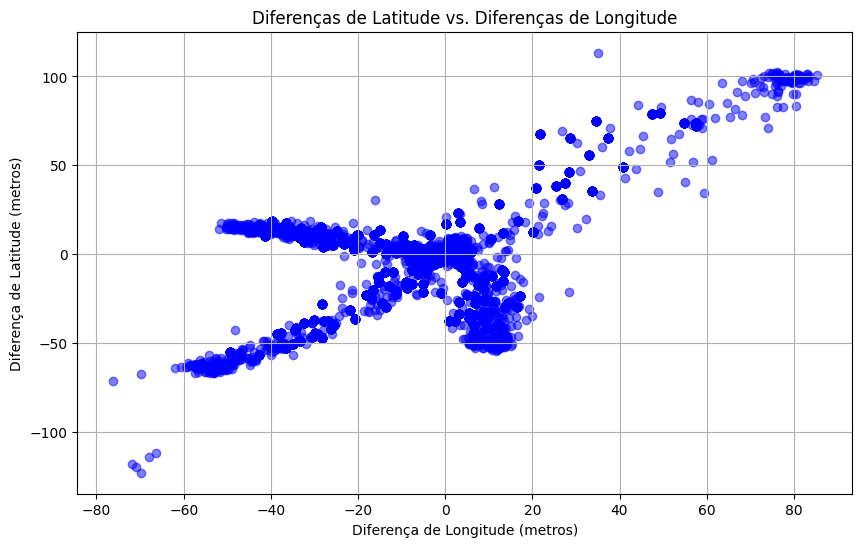

In [37]:
# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(diferencas_longitude, diferencas_latitude, color='blue', alpha=0.5)
plt.title('Diferenças de Latitude vs. Diferenças de Longitude')
plt.xlabel('Diferença de Longitude (metros)')
plt.ylabel('Diferença de Latitude (metros)')
plt.grid(True)
plt.show()

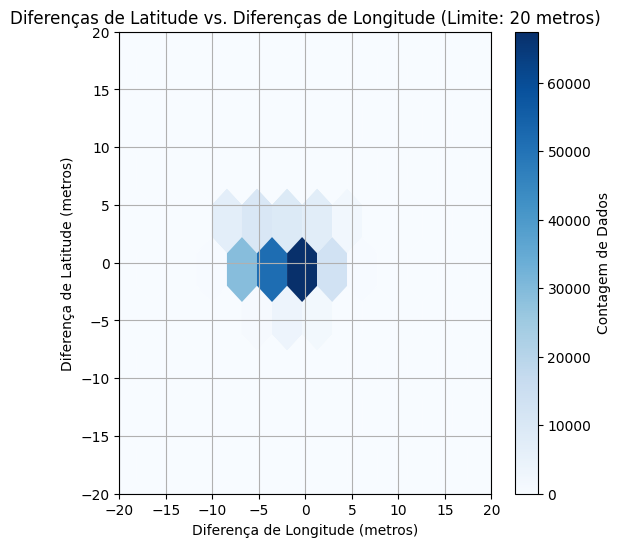

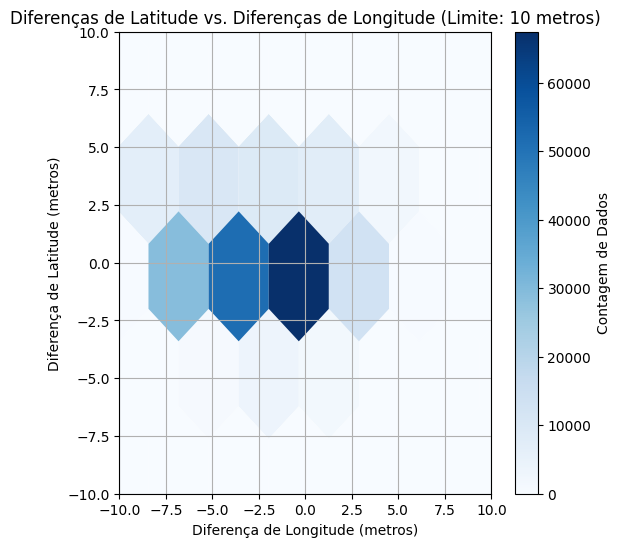

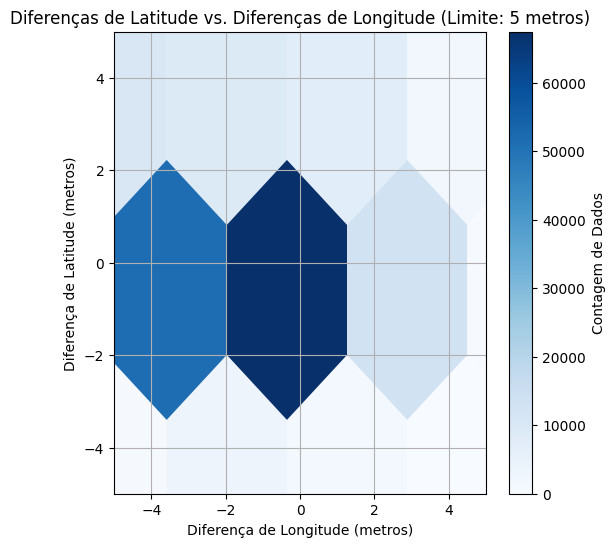

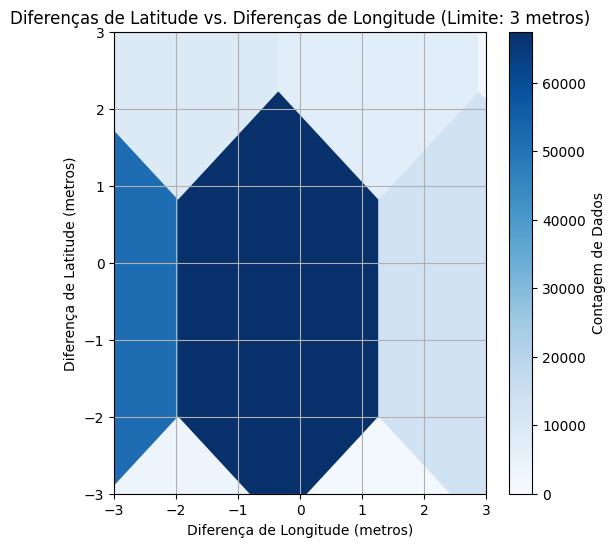

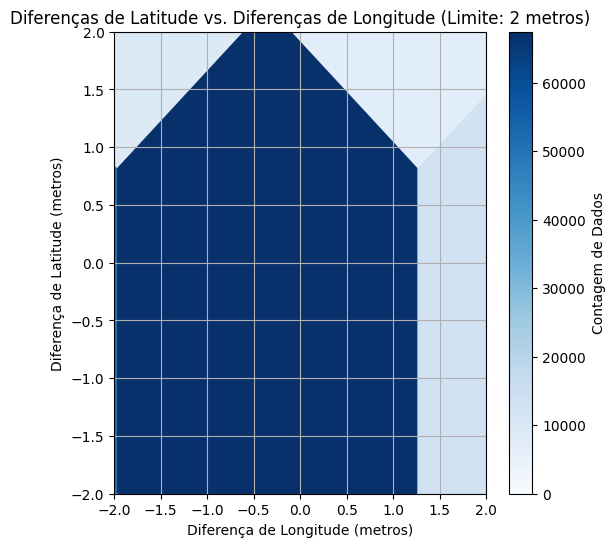

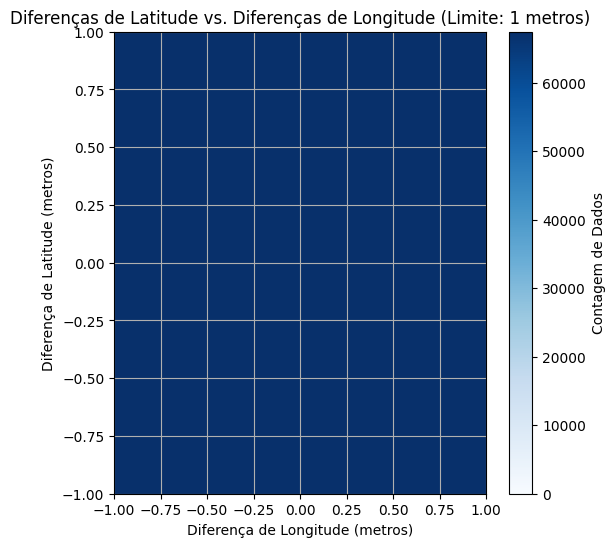

In [40]:
# Definir os limites para cada caso
limites = [20, 10, 5, 3, 2, 1]

# Plotar um gráfico separado para cada caso
for i, limite in enumerate(limites, 1):
    plt.figure(figsize=(6, 6))
    plt.hexbin(diferencas_longitude, diferencas_latitude, gridsize=50, cmap='Blues', edgecolors='none')
    plt.colorbar(label='Contagem de Dados')
    plt.title(f'Diferenças de Latitude vs. Diferenças de Longitude (Limite: {limite} metros)')
    plt.xlabel('Diferença de Longitude (metros)')
    plt.ylabel('Diferença de Latitude (metros)')
    plt.xlim(-limite, limite)
    plt.ylim(-limite, limite)
    plt.grid(True)
    plt.show()

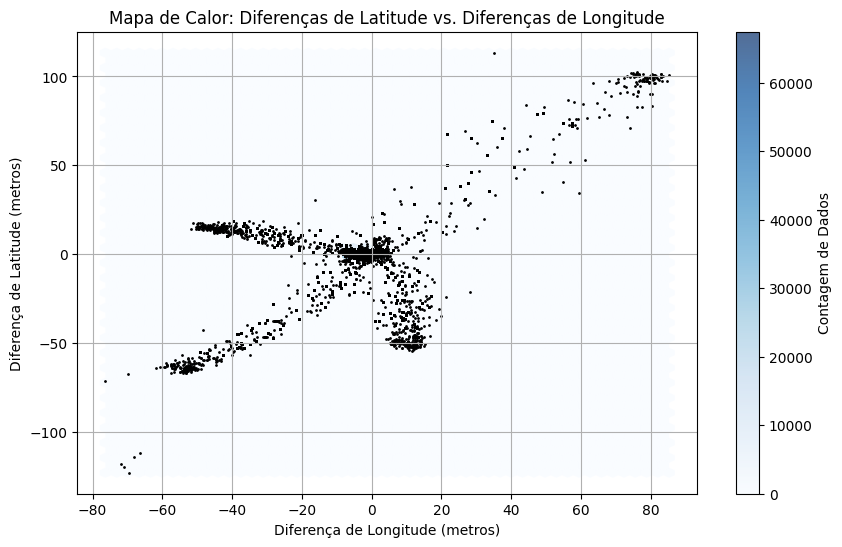

In [41]:
# Plotar um gráfico de dispersão com mapa de calor
plt.figure(figsize=(10, 6))
plt.hexbin(diferencas_longitude, diferencas_latitude, gridsize=50, cmap='Blues', edgecolors='none', alpha=0.7)
plt.colorbar(label='Contagem de Dados')
plt.scatter(diferencas_longitude, diferencas_latitude, color='black', s=1)
plt.title('Mapa de Calor: Diferenças de Latitude vs. Diferenças de Longitude')
plt.xlabel('Diferença de Longitude (metros)')
plt.ylabel('Diferença de Latitude (metros)')
plt.grid(True)
plt.show()

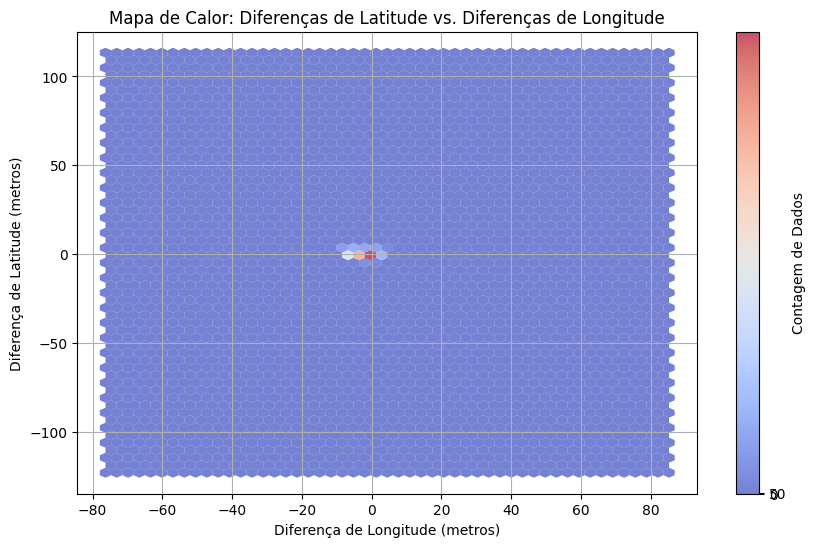

In [42]:
# Definir manualmente os limites para o mapa de calor
min_density = 0  # densidade mínima
max_density = 50  # densidade máxima

# Plotar um gráfico de dispersão com mapa de calor
plt.figure(figsize=(10, 6))
hb = plt.hexbin(diferencas_longitude, diferencas_latitude, gridsize=50, cmap='coolwarm', edgecolors='none', alpha=0.7)
plt.colorbar(hb, label='Contagem de Dados', ticks=[min_density, max_density])
plt.title('Mapa de Calor: Diferenças de Latitude vs. Diferenças de Longitude')
plt.xlabel('Diferença de Longitude (metros)')
plt.ylabel('Diferença de Latitude (metros)')
plt.grid(True)
plt.show()

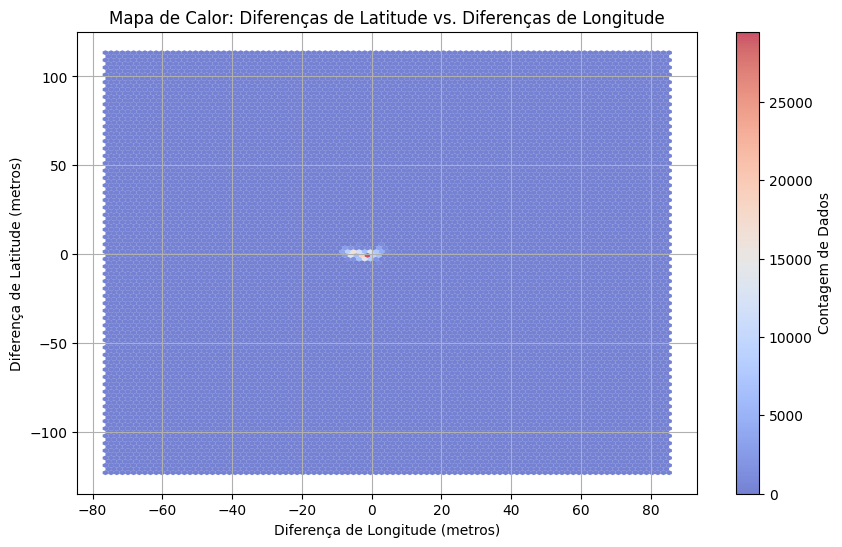

In [43]:
# Plotar um gráfico de dispersão com mapa de calor mais detalhado
plt.figure(figsize=(10, 6))
hb = plt.hexbin(diferencas_longitude, diferencas_latitude, gridsize=100, cmap='coolwarm', edgecolors='none', alpha=0.7)
plt.colorbar(hb, label='Contagem de Dados')
plt.title('Mapa de Calor: Diferenças de Latitude vs. Diferenças de Longitude')
plt.xlabel('Diferença de Longitude (metros)')
plt.ylabel('Diferença de Latitude (metros)')
plt.grid(True)
plt.show()

In [44]:
def plot_heatmap(diferencas_latitude, diferencas_longitude, gridsize):
    plt.figure(figsize=(10, 6))
    hb = plt.hexbin(diferencas_longitude, diferencas_latitude, gridsize=gridsize, cmap='coolwarm', edgecolors='none', alpha=0.7)
    plt.colorbar(hb, label='Contagem de Dados')
    plt.title(f'Mapa de Calor: Diferenças de Latitude vs. Diferenças de Longitude (Gridsize={gridsize})')
    plt.xlabel('Diferença de Longitude (metros)')
    plt.ylabel('Diferença de Latitude (metros)')
    plt.grid(True)
    plt.show()

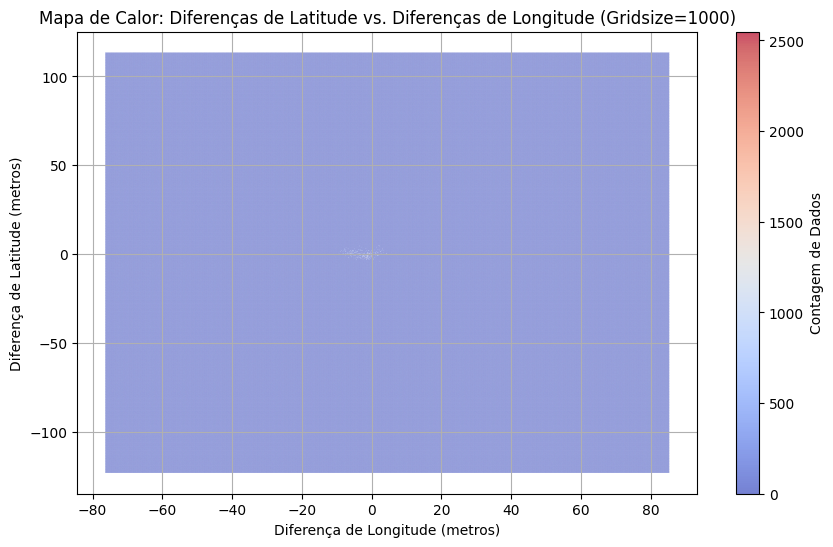

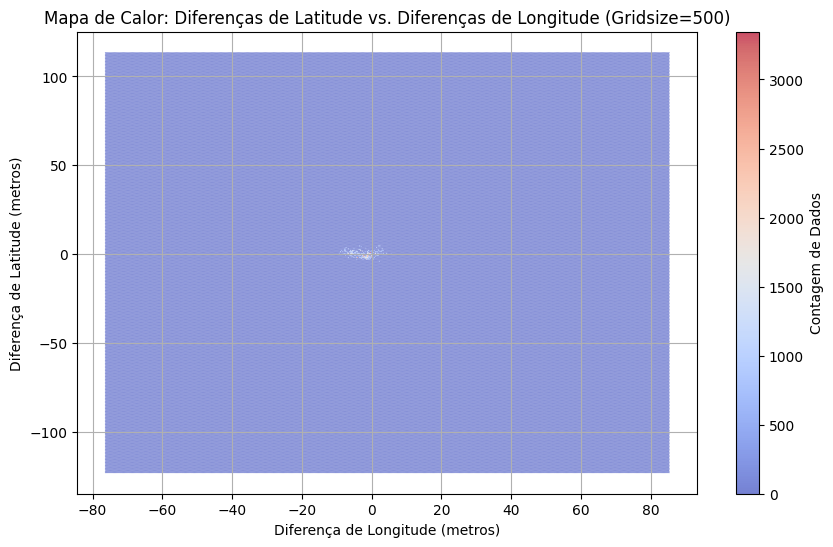

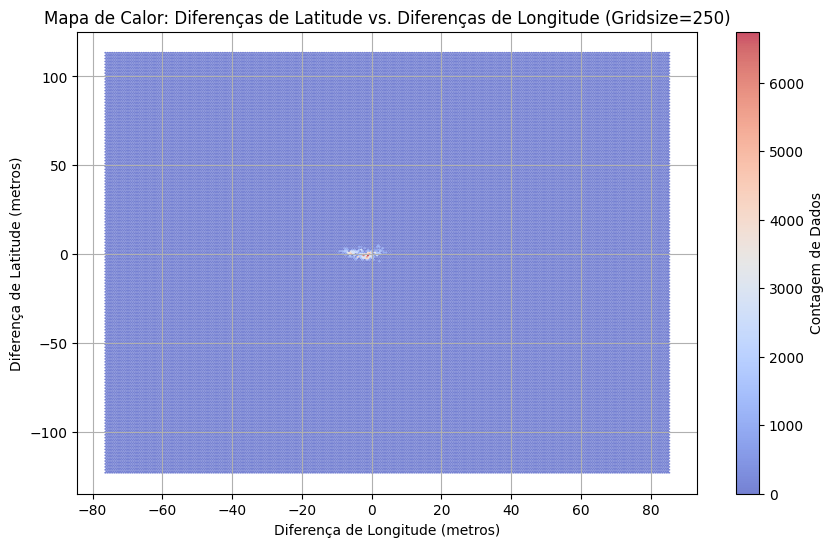

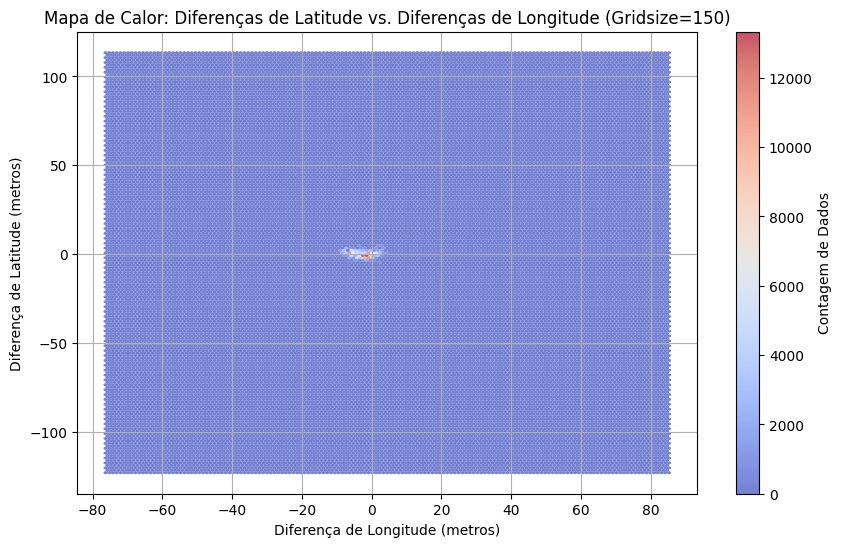

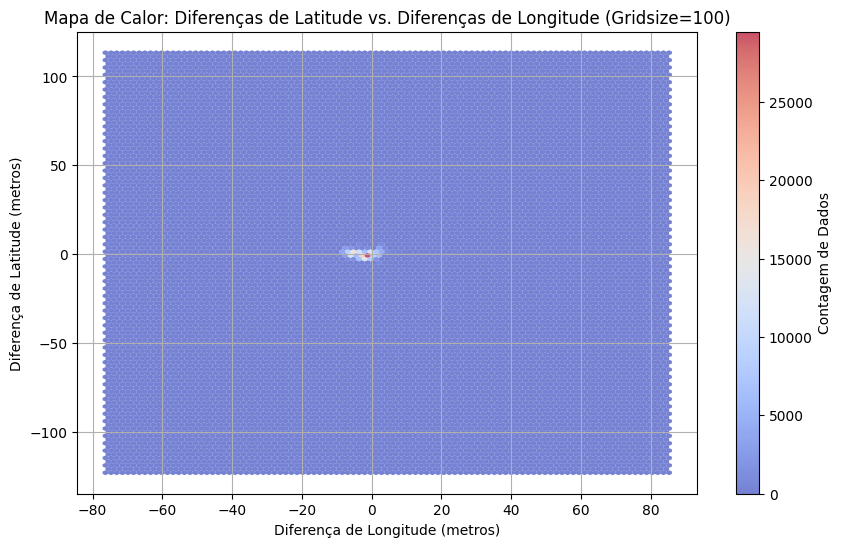

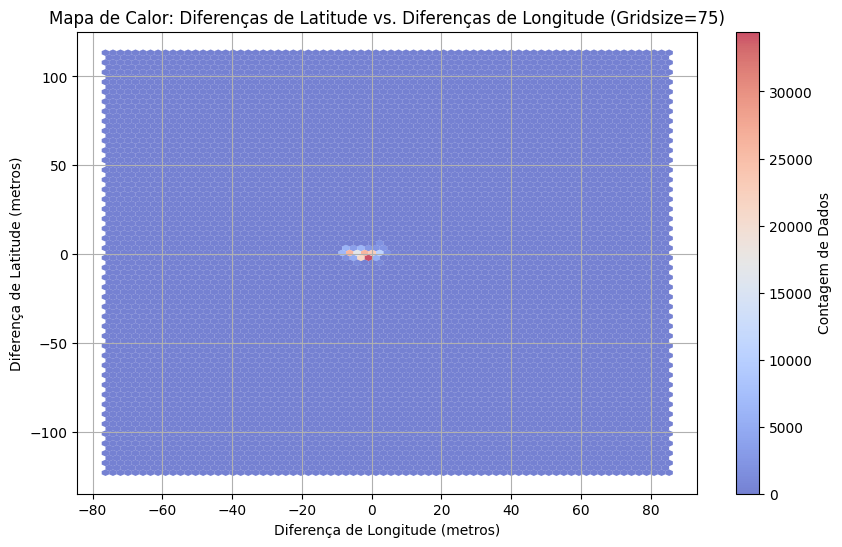

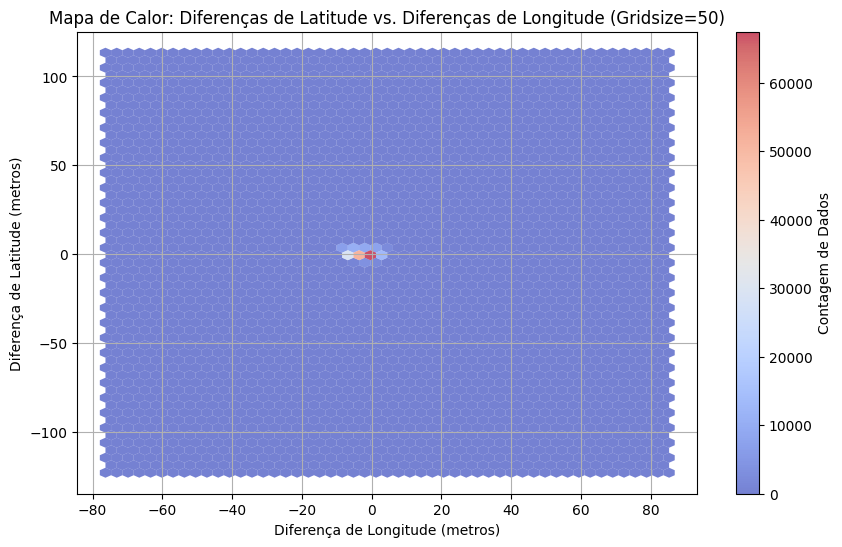

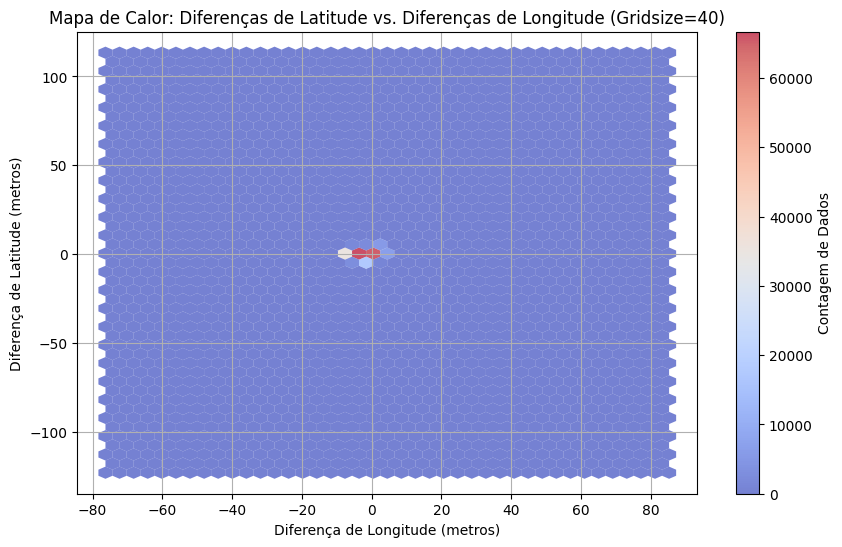

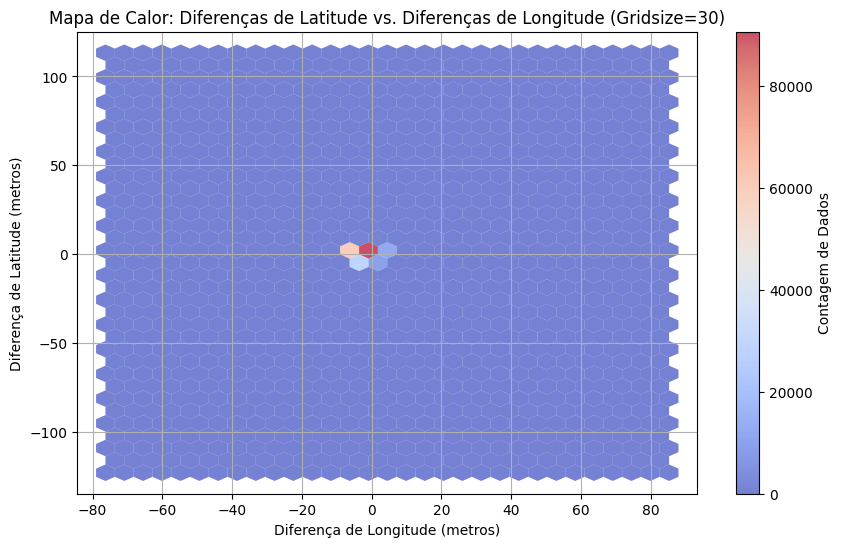

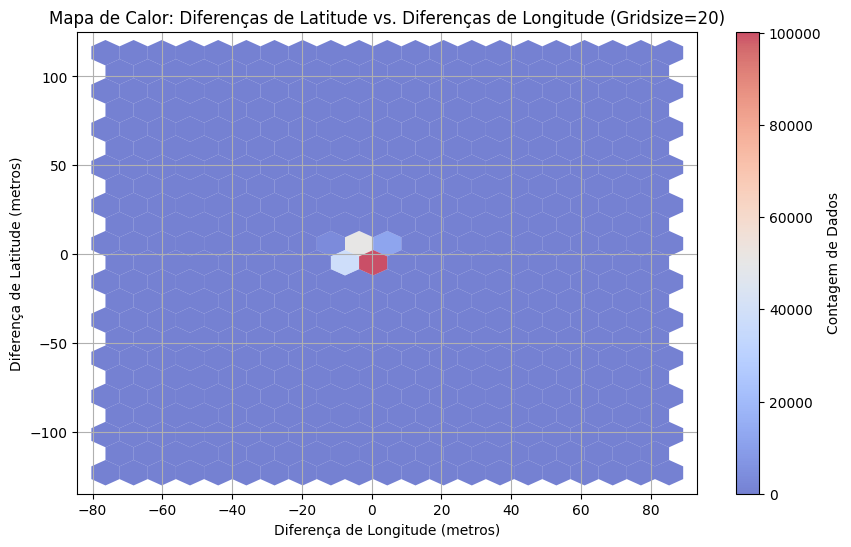

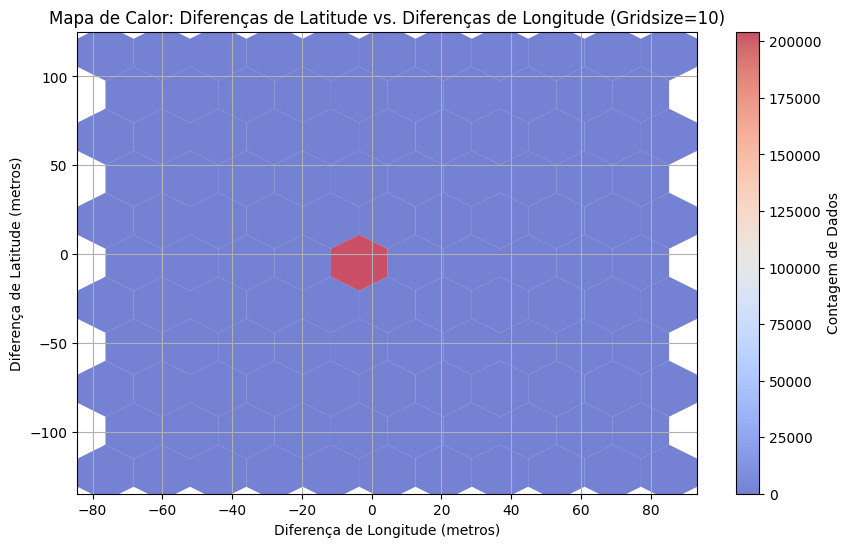

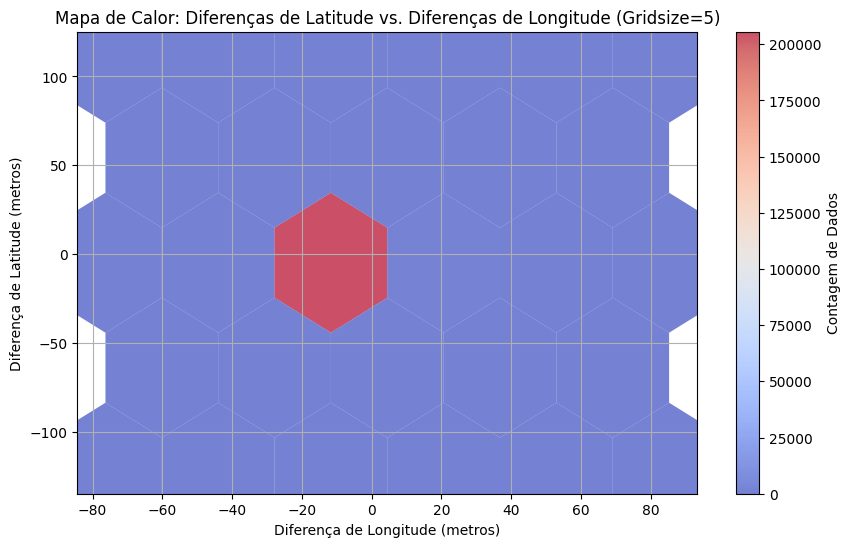

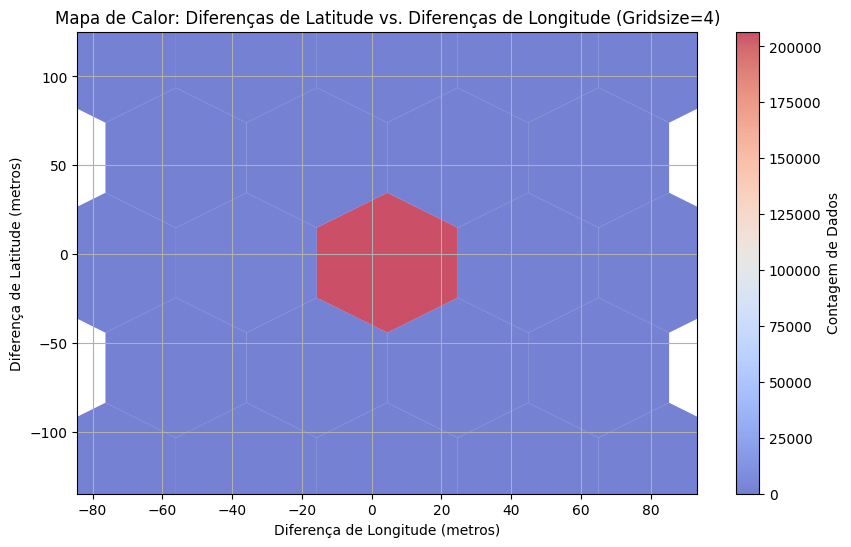

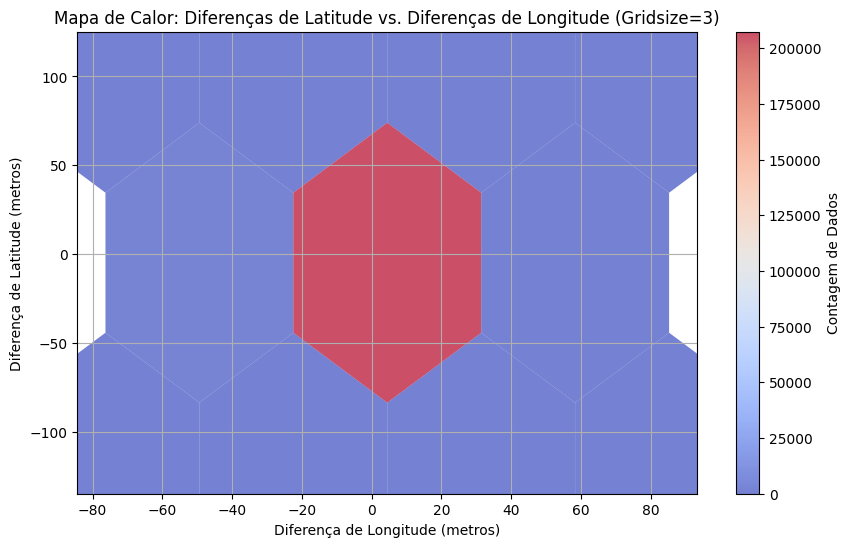

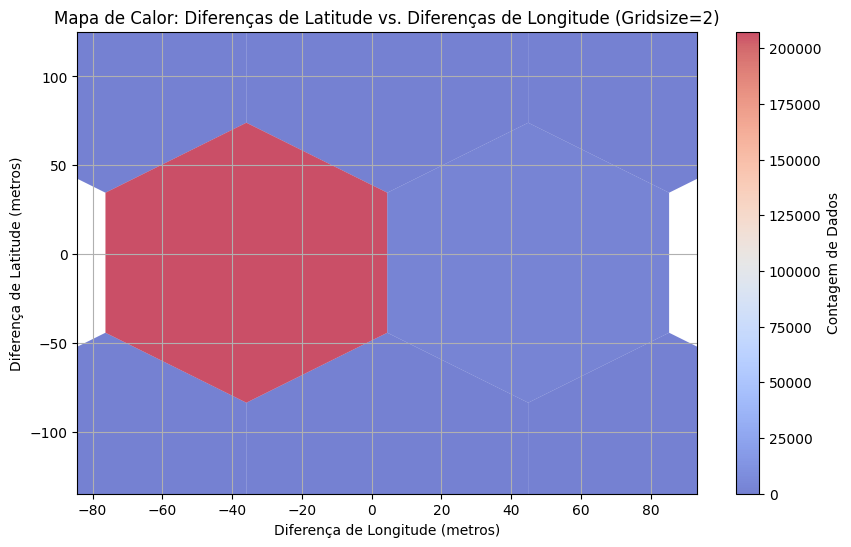

ZeroDivisionError: float division by zero

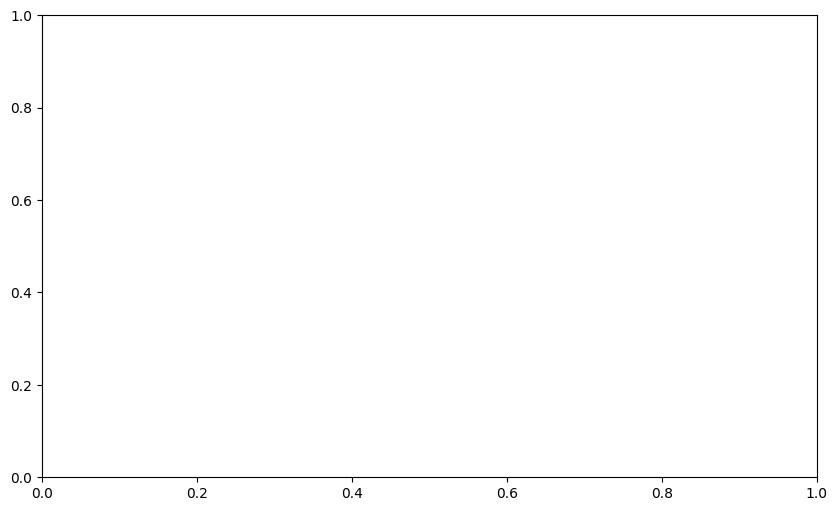

In [47]:
# Gerar mapas de calor para diferentes tamanhos de bin
tamanhos_bin = [1000,500,250,150,100,75,50,40,30, 20, 10, 5, 4, 3, 2, 1]
for tamanho_bin in tamanhos_bin:
    plot_heatmap(diferencas_latitude, diferencas_longitude, tamanho_bin)

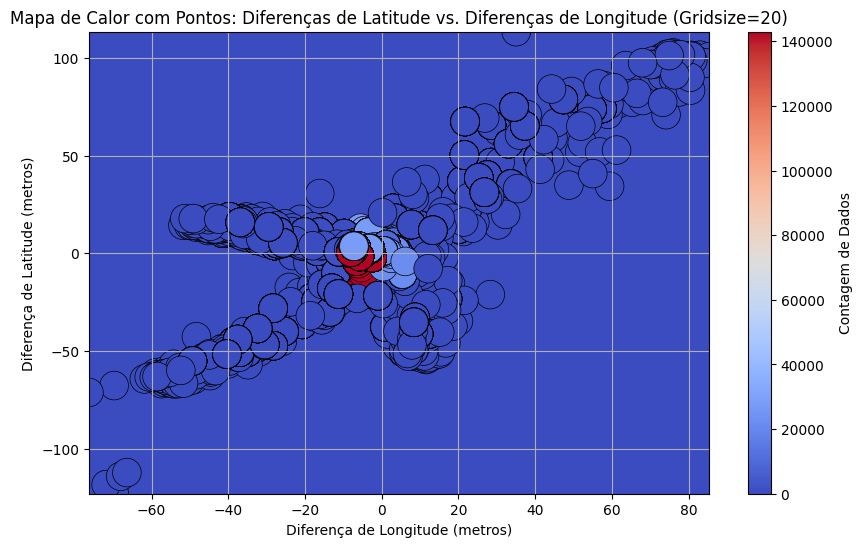

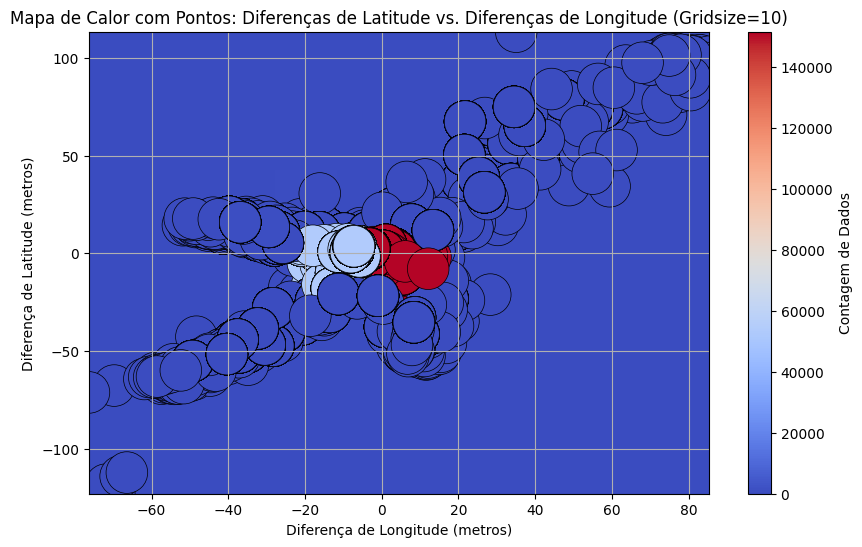

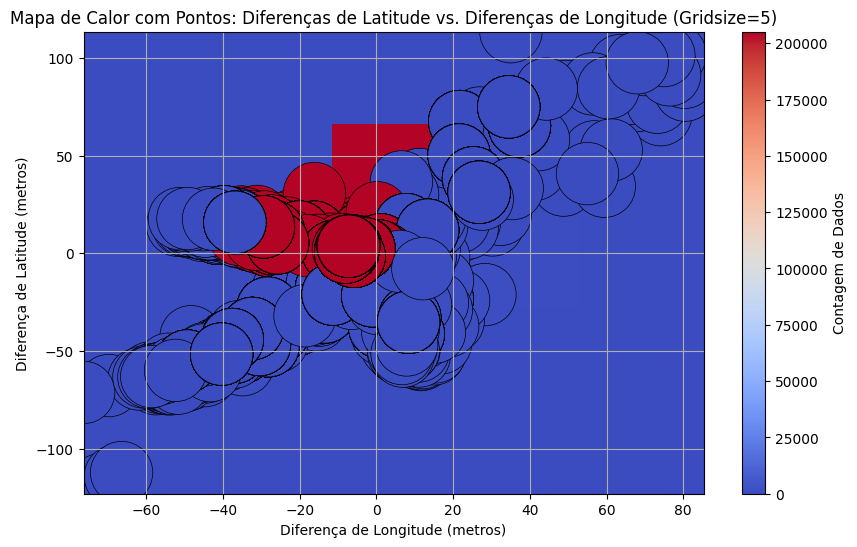

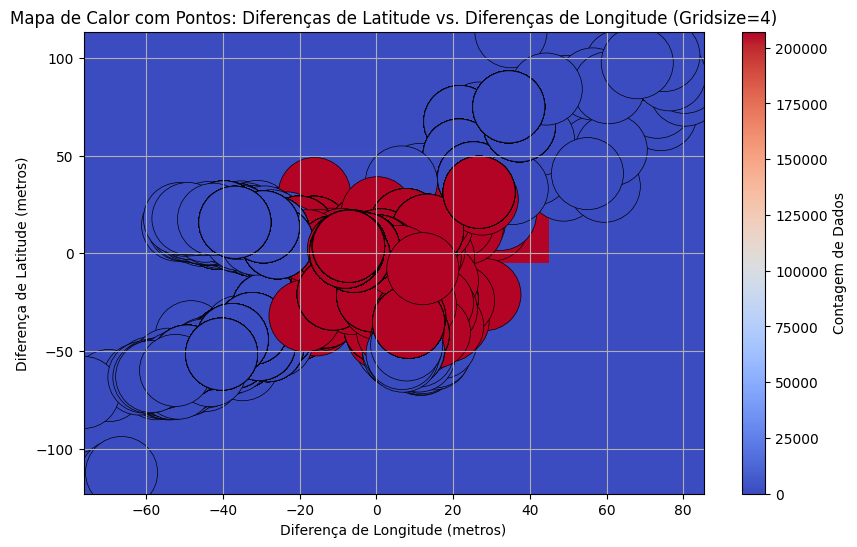

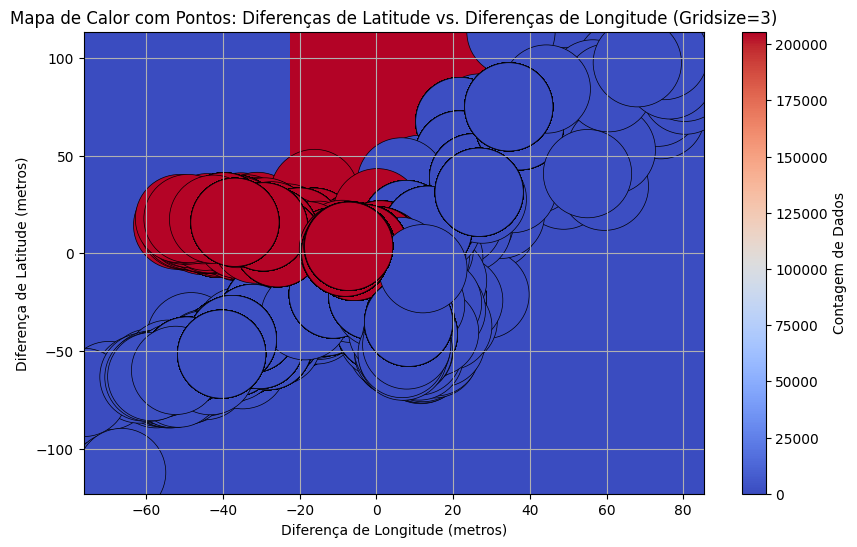

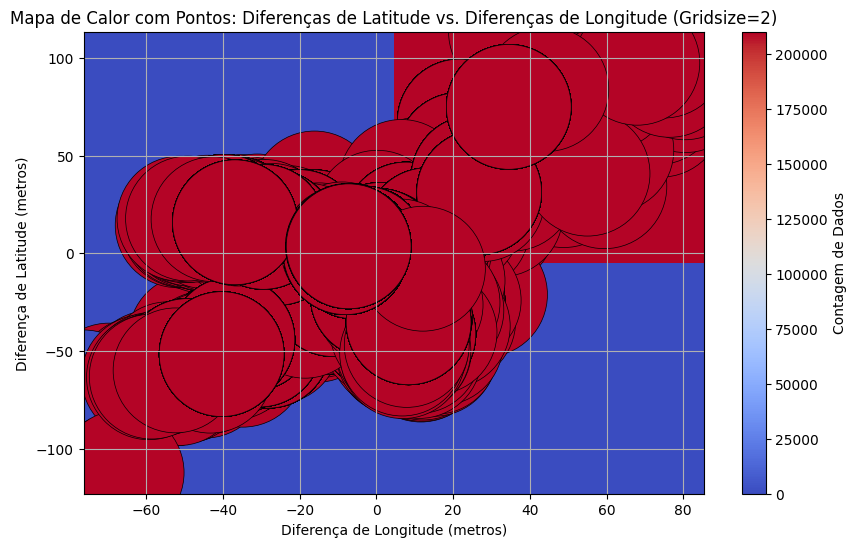

IndexError: index 1 is out of bounds for axis 0 with size 1

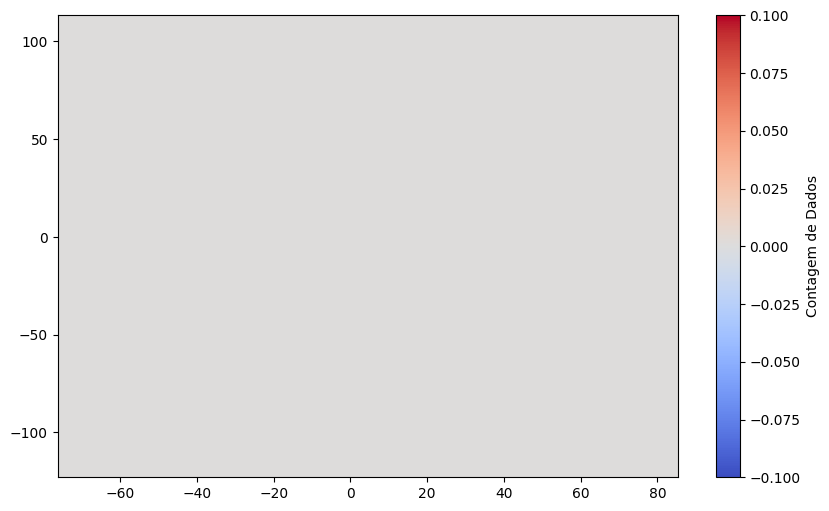

In [55]:
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_density(diferencas_latitude, diferencas_longitude, gridsize):
    x_min, x_max = np.min(diferencas_longitude), np.max(diferencas_longitude)
    y_min, y_max = np.min(diferencas_latitude), np.max(diferencas_latitude)
    x_bins = np.linspace(x_min, x_max, gridsize)
    y_bins = np.linspace(y_min, y_max, gridsize)
    density = np.zeros((gridsize, gridsize))
    for x, y in zip(diferencas_longitude, diferencas_latitude):
        ix = np.searchsorted(x_bins, x)
        iy = np.searchsorted(y_bins, y)
        if 0 <= ix < gridsize and 0 <= iy < gridsize:
            density[iy, ix] += 1
    return density

def plot_heatmap_with_points(diferencas_latitude, diferencas_longitude, gridsize):
    density = calculate_density(diferencas_latitude, diferencas_longitude, gridsize)
    x_min, x_max = np.min(diferencas_longitude), np.max(diferencas_longitude)
    y_min, y_max = np.min(diferencas_latitude), np.max(diferencas_latitude)
    x_bins = np.linspace(x_min, x_max, gridsize)
    y_bins = np.linspace(y_min, y_max, gridsize)
    plt.figure(figsize=(10, 6))
    plt.imshow(density, extent=(x_min, x_max, y_min, y_max), cmap='coolwarm', origin='lower', aspect='auto')
    plt.colorbar(label='Contagem de Dados')
    
    # Calcular o tamanho dos pontos com base na densidade
    sizes = np.zeros(len(diferencas_latitude))
    for i, (x, y) in enumerate(zip(diferencas_longitude, diferencas_latitude)):
        ix = np.searchsorted(x_bins, x)
        iy = np.searchsorted(y_bins, y)
        sizes[i] = density[iy, ix]
    
    # Limitar o tamanho máximo dos pontos conforme o tamanho do bin
    max_size = (x_bins[1] - x_bins[0]) * 50  # Ajuste o fator 50 conforme necessário
    plt.scatter(diferencas_longitude, diferencas_latitude, c=sizes, cmap='coolwarm', s=max_size, edgecolors='k', linewidths=0.5)
    
    plt.title(f'Mapa de Calor com Pontos: Diferenças de Latitude vs. Diferenças de Longitude (Gridsize={gridsize})')
    plt.xlabel('Diferença de Longitude (metros)')
    plt.ylabel('Diferença de Latitude (metros)')
    plt.grid(True)
    plt.show()

# Carregar os dados do arquivo JSON
with open("dados_diferenca_em_metros.json", "r") as arquivo_json:
    dados = json.load(arquivo_json)

# Listas para armazenar as diferenças em metros de latitude e longitude
diferencas_latitude = []
diferencas_longitude = []

# Extrair as diferenças em metros de latitude e longitude dos dados
for dado in dados:
    if 'gnss_data' in dado:
        gnss_data = dado['gnss_data']
        diferenca_latitude = gnss_data['latitudeDiferencaMetros']
        diferenca_longitude = gnss_data['longitudeDiferencaMetros']
        diferencas_latitude.append(diferenca_latitude)
        diferencas_longitude.append(diferenca_longitude)

# Gerar mapas de calor para diferentes tamanhos de bin com pontos
tamanhos_bin = [20, 10, 5, 4, 3, 2, 1]
for tamanho_bin in tamanhos_bin:
    plot_heatmap_with_points(diferencas_latitude, diferencas_longitude, tamanho_bin)


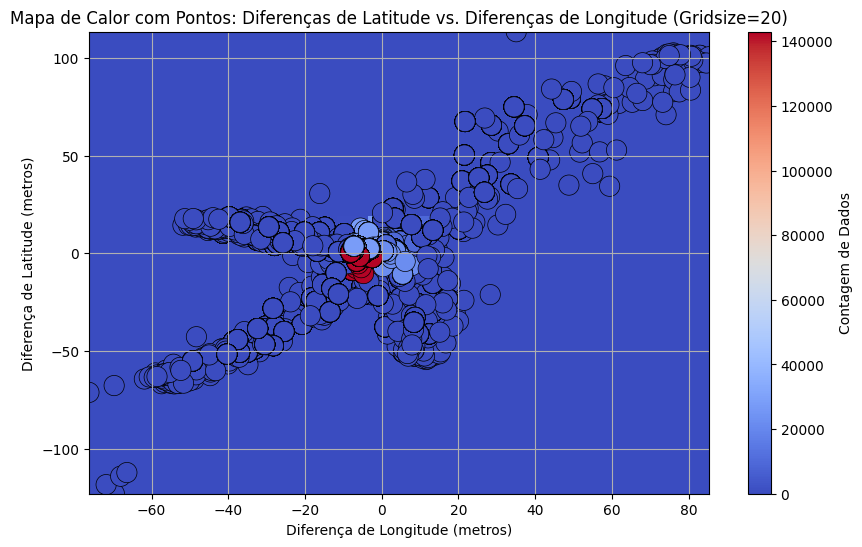

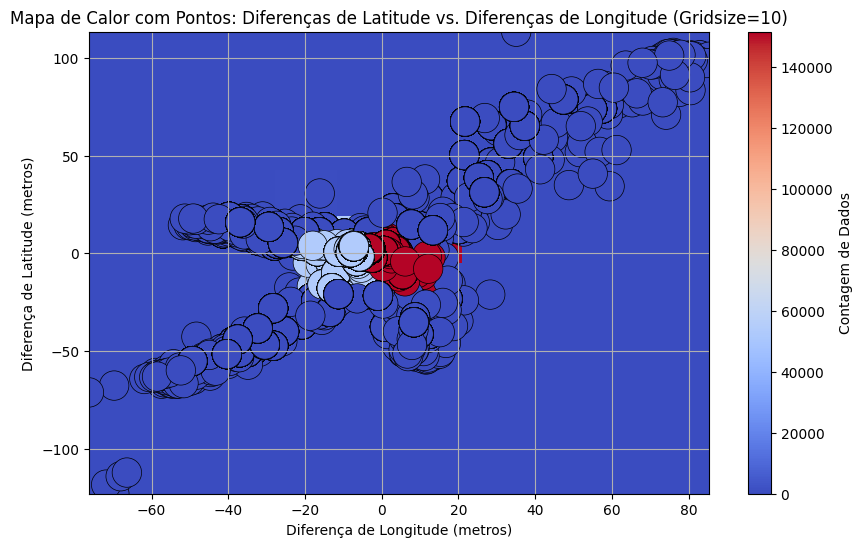

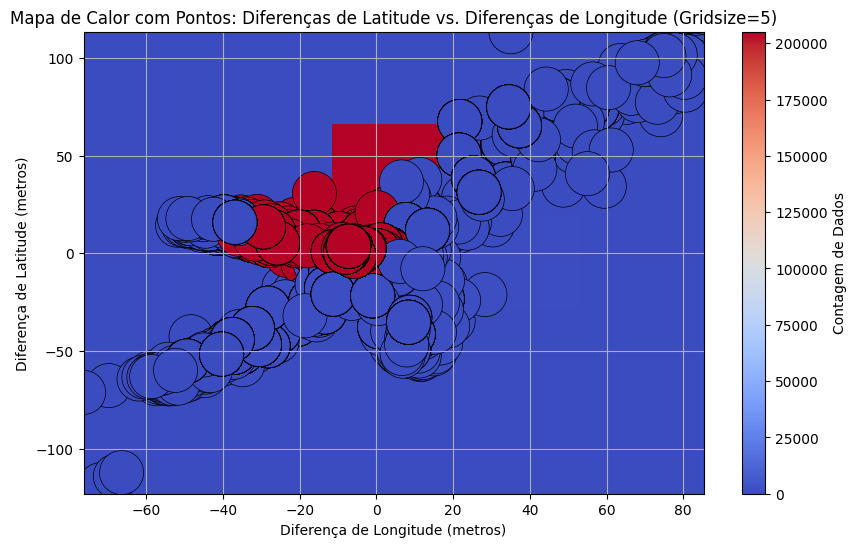

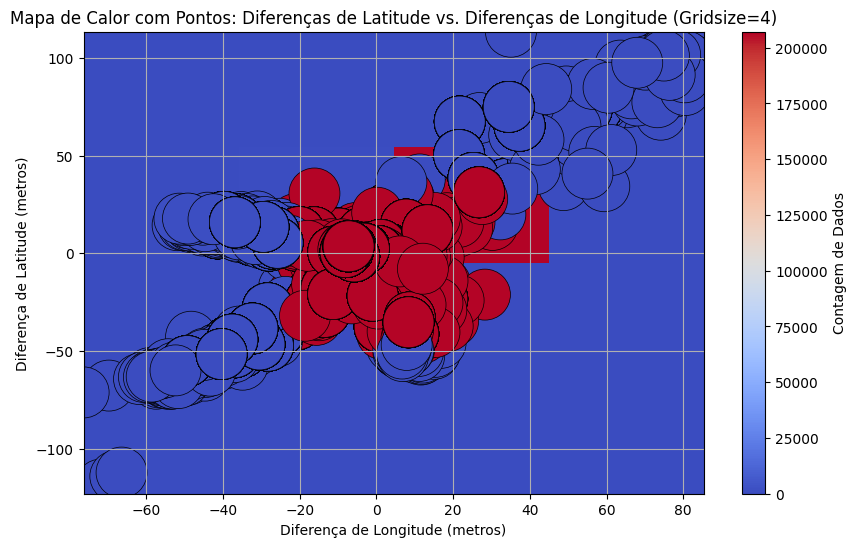

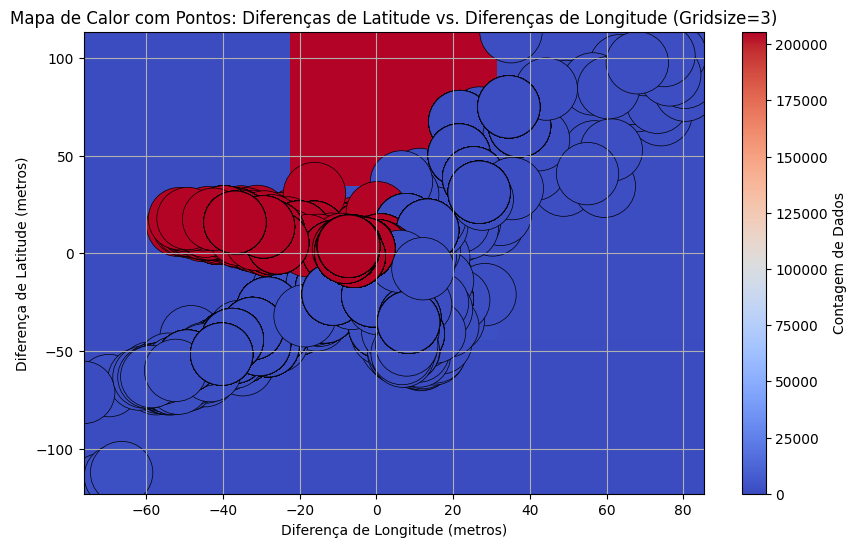

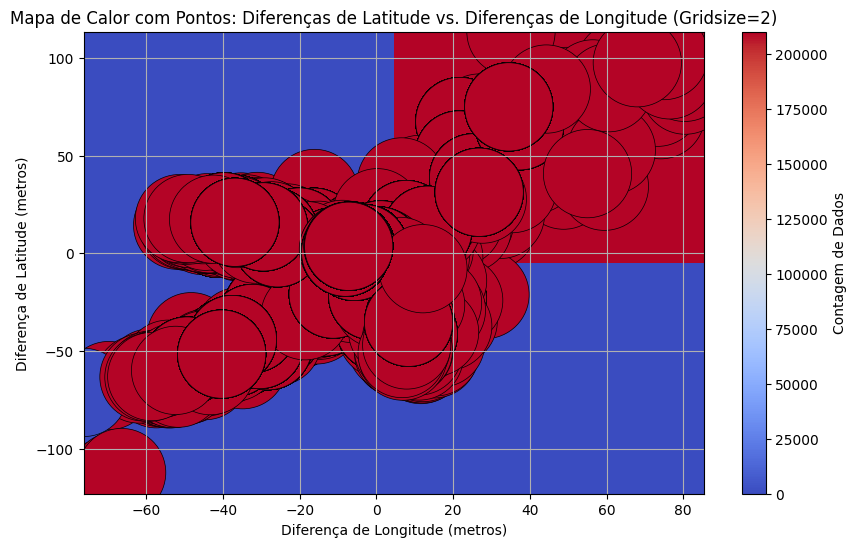

IndexError: index 1 is out of bounds for axis 0 with size 1

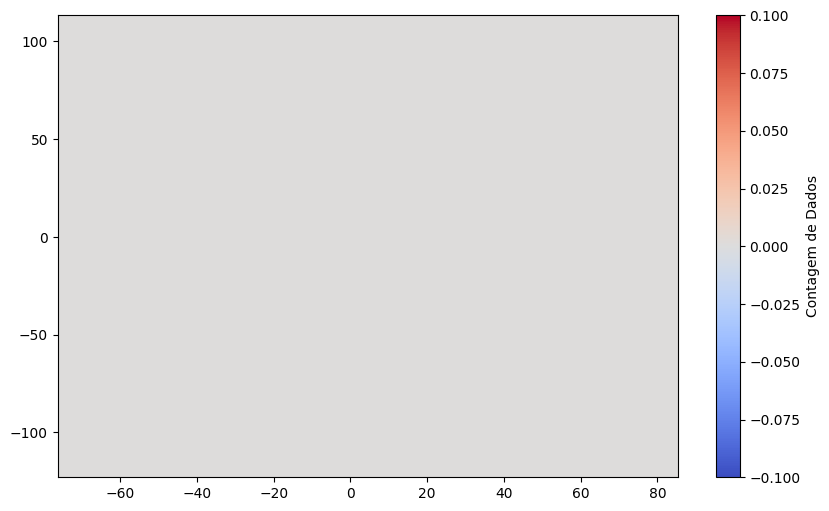

In [56]:
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_density(diferencas_latitude, diferencas_longitude, gridsize):
    x_min, x_max = np.min(diferencas_longitude), np.max(diferencas_longitude)
    y_min, y_max = np.min(diferencas_latitude), np.max(diferencas_latitude)
    x_bins = np.linspace(x_min, x_max, gridsize)
    y_bins = np.linspace(y_min, y_max, gridsize)
    density = np.zeros((gridsize, gridsize))
    for x, y in zip(diferencas_longitude, diferencas_latitude):
        ix = np.searchsorted(x_bins, x)
        iy = np.searchsorted(y_bins, y)
        if 0 <= ix < gridsize and 0 <= iy < gridsize:
            density[iy, ix] += 1
    return density

def plot_heatmap_with_points(diferencas_latitude, diferencas_longitude, gridsize):
    density = calculate_density(diferencas_latitude, diferencas_longitude, gridsize)
    x_min, x_max = np.min(diferencas_longitude), np.max(diferencas_longitude)
    y_min, y_max = np.min(diferencas_latitude), np.max(diferencas_latitude)
    x_bins = np.linspace(x_min, x_max, gridsize)
    y_bins = np.linspace(y_min, y_max, gridsize)
    plt.figure(figsize=(10, 6))
    plt.imshow(density, extent=(x_min, x_max, y_min, y_max), cmap='coolwarm', origin='lower', aspect='auto')
    plt.colorbar(label='Contagem de Dados')
    
    # Calcular o tamanho dos pontos com base na densidade
    sizes = np.zeros(len(diferencas_latitude))
    for i, (x, y) in enumerate(zip(diferencas_longitude, diferencas_latitude)):
        ix = np.searchsorted(x_bins, x)
        iy = np.searchsorted(y_bins, y)
        sizes[i] = density[iy, ix]
    
    # Limitar o tamanho máximo dos pontos conforme o tamanho do bin
    max_size = (x_bins[1] - x_bins[0]) * 25  # Reduzir pela metade
    plt.scatter(diferencas_longitude, diferencas_latitude, c=sizes, cmap='coolwarm', s=max_size, edgecolors='k', linewidths=0.5)
    
    plt.title(f'Mapa de Calor com Pontos: Diferenças de Latitude vs. Diferenças de Longitude (Gridsize={gridsize})')
    plt.xlabel('Diferença de Longitude (metros)')
    plt.ylabel('Diferença de Latitude (metros)')
    plt.grid(True)
    plt.show()

# Carregar os dados do arquivo JSON
with open("dados_diferenca_em_metros.json", "r") as arquivo_json:
    dados = json.load(arquivo_json)

# Listas para armazenar as diferenças em metros de latitude e longitude
diferencas_latitude = []
diferencas_longitude = []

# Extrair as diferenças em metros de latitude e longitude dos dados
for dado in dados:
    if 'gnss_data' in dado:
        gnss_data = dado['gnss_data']
        diferenca_latitude = gnss_data['latitudeDiferencaMetros']
        diferenca_longitude = gnss_data['longitudeDiferencaMetros']
        diferencas_latitude.append(diferenca_latitude)
        diferencas_longitude.append(diferenca_longitude)

# Gerar mapas de calor para diferentes tamanhos de bin com pontos
tamanhos_bin = [20, 10, 5, 4, 3, 2, 1]
for tamanho_bin in tamanhos_bin:
    plot_heatmap_with_points(diferencas_latitude, diferencas_longitude, tamanho_bin)


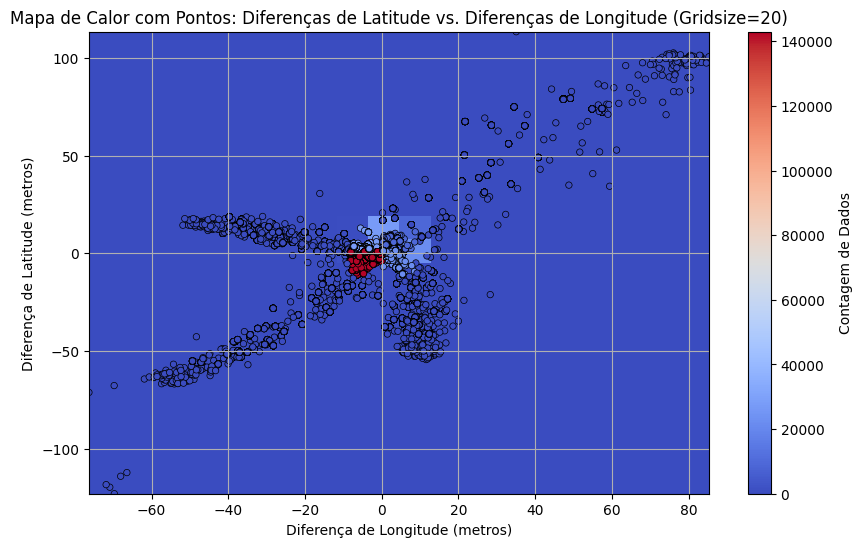

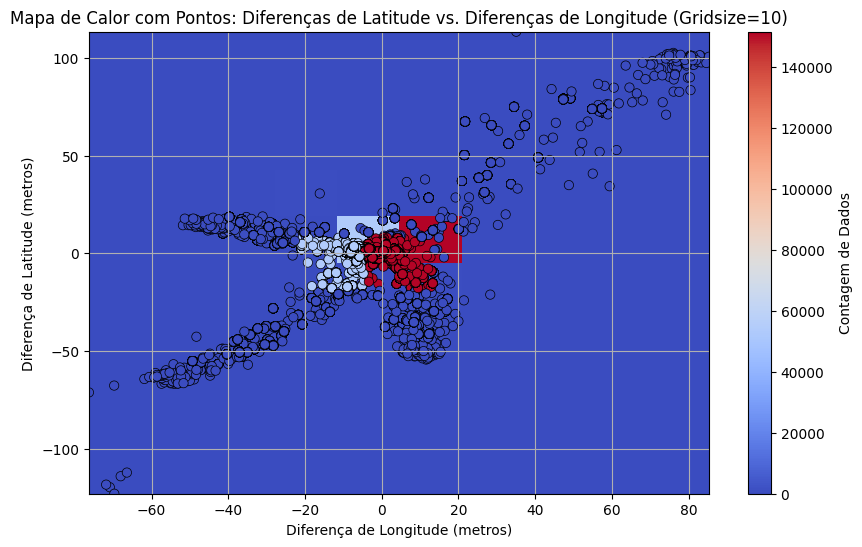

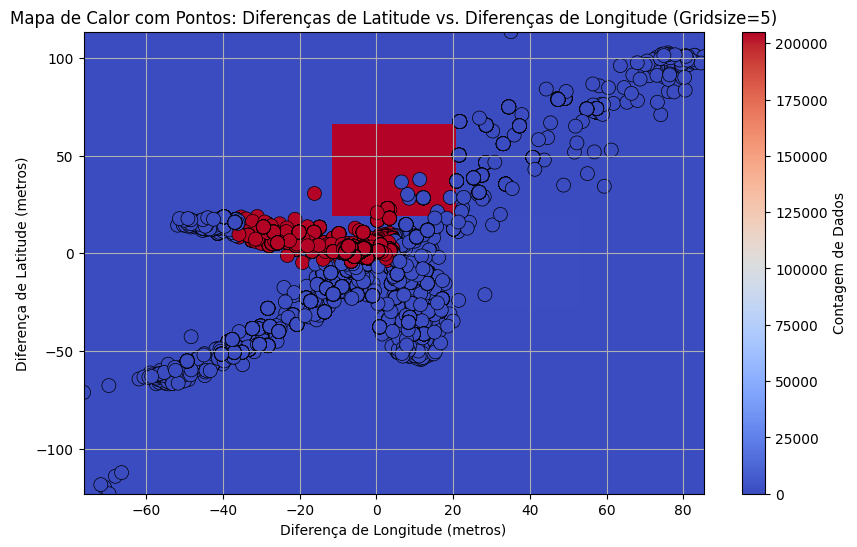

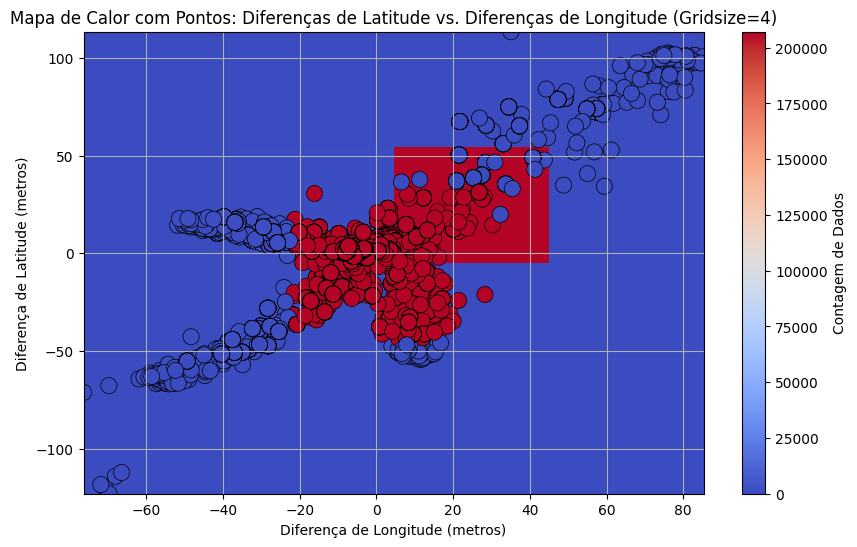

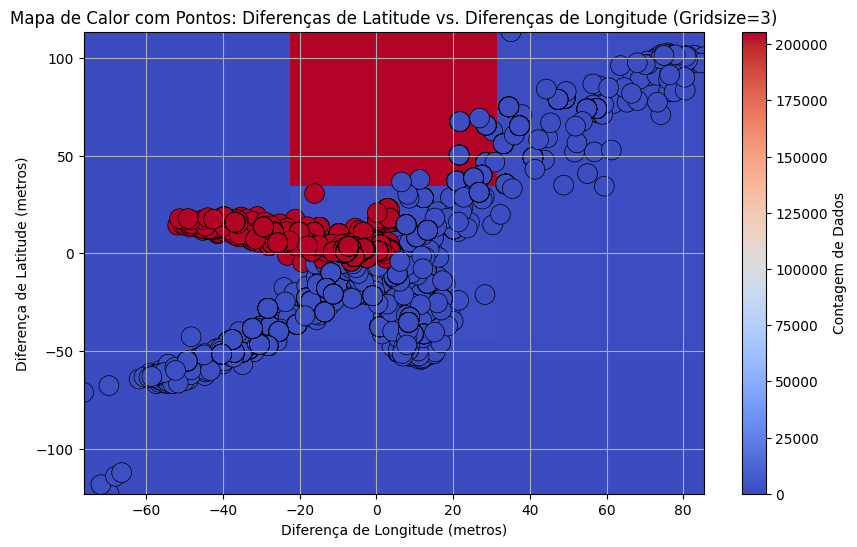

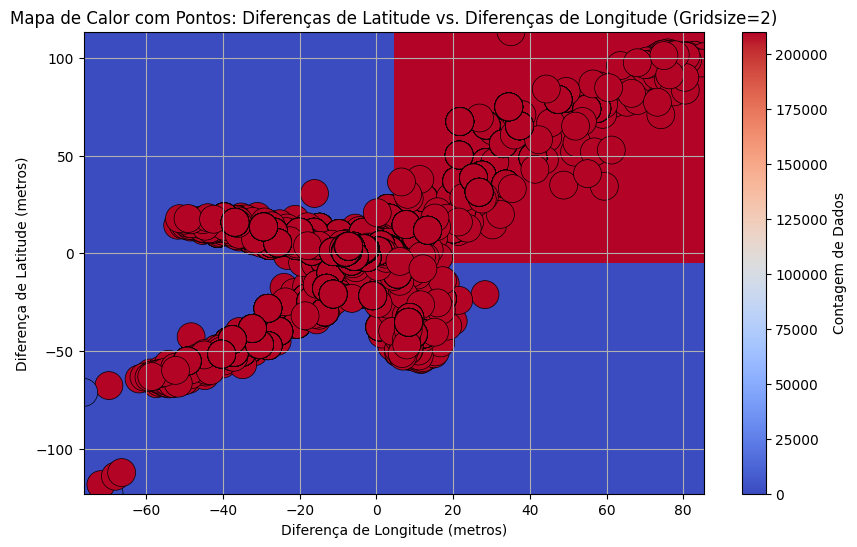

IndexError: index 1 is out of bounds for axis 0 with size 1

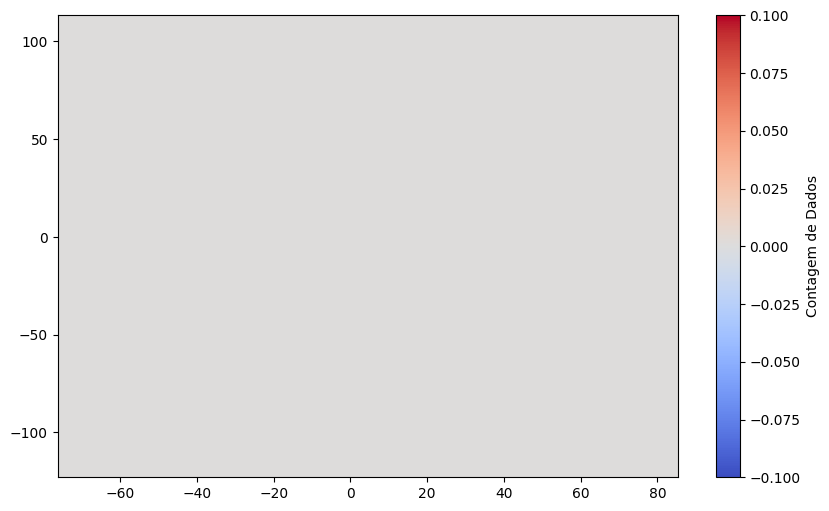

In [59]:
import json
import numpy as np
import matplotlib.pyplot as plt

def calculate_density(diferencas_latitude, diferencas_longitude, gridsize):
    x_min, x_max = np.min(diferencas_longitude), np.max(diferencas_longitude)
    y_min, y_max = np.min(diferencas_latitude), np.max(diferencas_latitude)
    x_bins = np.linspace(x_min, x_max, gridsize)
    y_bins = np.linspace(y_min, y_max, gridsize)
    density = np.zeros((gridsize, gridsize))
    for x, y in zip(diferencas_longitude, diferencas_latitude):
        ix = np.searchsorted(x_bins, x)
        iy = np.searchsorted(y_bins, y)
        if 0 <= ix < gridsize and 0 <= iy < gridsize:
            density[iy, ix] += 1
    return density

def plot_heatmap_with_points(diferencas_latitude, diferencas_longitude, gridsize):
    density = calculate_density(diferencas_latitude, diferencas_longitude, gridsize)
    x_min, x_max = np.min(diferencas_longitude), np.max(diferencas_longitude)
    y_min, y_max = np.min(diferencas_latitude), np.max(diferencas_latitude)
    x_bins = np.linspace(x_min, x_max, gridsize)
    y_bins = np.linspace(y_min, y_max, gridsize)
    plt.figure(figsize=(10, 6))
    plt.imshow(density, extent=(x_min, x_max, y_min, y_max), cmap='coolwarm', origin='lower', aspect='auto')
    plt.colorbar(label='Contagem de Dados')
    
    # Calcular o tamanho dos pontos com base na densidade
    sizes = np.zeros(len(diferencas_latitude))
    for i, (x, y) in enumerate(zip(diferencas_longitude, diferencas_latitude)):
        ix = np.searchsorted(x_bins, x)
        iy = np.searchsorted(y_bins, y)
        sizes[i] = density[iy, ix]
    
    # Limitar o tamanho máximo dos pontos conforme o tamanho do bin
    max_size = (x_bins[1] - x_bins[0]) * 0.5  # Reduzir ainda mais
    plt.scatter(diferencas_longitude, diferencas_latitude, c=sizes, cmap='coolwarm', s=max_size, edgecolors='k', linewidths=0.5)
    
    plt.title(f'Mapa de Calor com Pontos: Diferenças de Latitude vs. Diferenças de Longitude (Gridsize={gridsize})')
    plt.xlabel('Diferença de Longitude (metros)')
    plt.ylabel('Diferença de Latitude (metros)')
    plt.grid(True)
    plt.show()

# Gerar mapas de calor para diferentes tamanhos de bin com pontos
tamanhos_bin = [20, 10, 5, 4, 3, 2, 1]
for tamanho_bin in tamanhos_bin:
    plot_heatmap_with_points(diferencas_latitude, diferencas_longitude, tamanho_bin)
